# Random Forest Model + Explainable AI Techniques (XAI)

## Import and Reading Data

In [1]:
import pandas as pd
import numpy as np
import joblib
import matplotlib.pyplot as plt

from sklearn import metrics
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier

Load Train Dataset

In [2]:
df_train = pd.read_csv("../0_Datasets/Farm-Flow/train.csv")

In [3]:
display(df_train)

fwd_pkts_tot  bwd_pkts_tot  fwd_data_pkts_tot  bwd_data_pkts_tot  \
0         -0.236304     -0.662387          -0.577140          -0.443123   
1         -0.672105     -0.457813          -0.577140          -0.443123   
2         -0.454205     -0.662387          -0.577140          -0.443123   
3          2.378496      2.406229           2.285759           2.444445   
4         -0.672105     -0.457813          -0.577140          -0.443123   
...             ...           ...                ...                ...   
47341     -0.454205     -0.457813          -0.577140          -0.443123   
47342     -0.454205     -0.662387          -0.577140          -0.443123   
47343      2.160596      1.997080           2.285759           2.444445   
47344      1.288996      1.383357           1.713179           0.711904   
47345     -0.672105     -0.457813          -0.577140          -0.443123   

       fwd_pkts_per_sec  bwd_pkts_per_sec  flow_pkts_per_sec  down_up_ratio  \
0             -0.277741         -0.268577          -0.273647      -1.394192   
1              0.490111          0.504662           0.498222       0.728588   
2             -0.277918         -0.268577          -0.273736      -1.394192   
3             -0.276874         -0.267504          -0.272675       0.728588   
4             -0.277823         -0.268460          -0.273629       0.728588   
...                 ...               ...                ...            ...   
47341         -0.276776         -0.267991          -0.272869      -0.332802   
47342         -0.277509         -0.268577          -0.273530      -1.394192   
47343         -0.276943         -0.267646          -0.272781       0.576960   
47344         -0.265775         -0.256330          -0.261520       0.728588   
47345         -0.277865         -0.268501          -0.273671       0.728588   

       fwd_header_size_tot  fwd_header_size_min  ...  flow_pkts_payload.max  \
0                -0.643844            -1.423582  ...              -0.562720   
1                -0.643844             0.278456  ...              -0.562720   
2                -0.724235            -1.423582  ...              -0.562720   
3                 2.129645            -0.147053  ...              -0.240860   
4                -0.684039            -0.147053  ...              -0.562720   
...                    ...                  ...  ...                    ...   
47341            -0.483062            -0.147053  ...              -0.562720   
47342            -0.724235            -1.423582  ...              -0.562720   
47343             1.928668            -0.147053  ...              -0.240860   
47344             2.330623             1.129475  ...              -0.250326   
47345            -0.684039            -0.147053  ...              -0.562720   

       flow_pkts_payload.tot  flow_pkts_payload.avg  flow_pkts_payload.std  \
0                  -0.744570              -0.562649              -0.557806   
1                  -0.744570              -0.562649              -0.557806   
2                  -0.744570              -0.562649              -0.557806   
3                   1.678331              -0.105550              -0.268638   
4                  -0.744570              -0.562649              -0.557806   
...                      ...                    ...                    ...   
47341              -0.744570              -0.562649              -0.557806   
47342              -0.744570              -0.562649              -0.557806   
47343               1.678331              -0.054762              -0.267306   
47344               0.400251              -0.238680              -0.346375   
47345              -0.744570              -0.562649              -0.557806   

       fwd_subflow_pkts  bwd_subflow_pkts  fwd_subflow_bytes  \
0             -0.556874         -0.638986          -0.741186   
1             -0.556874         -0.419418          -0.741186   
2             -0.556874         -0.638986          -0.741186   
3              

Load Test Dataset

In [4]:
df_test = pd.read_csv("../0_Datasets/Farm-Flow/test.csv")

In [5]:
display(df_test)

fwd_pkts_tot  bwd_pkts_tot  fwd_data_pkts_tot  bwd_data_pkts_tot  \
0         -0.672105     -0.457813          -0.577140          -0.443123   
1         -0.672105     -0.457813          -0.577140          -0.443123   
2         -0.454205     -0.457813          -0.577140          -0.443123   
3          2.378496      2.406229           2.285759           2.444445   
4         -0.454205     -0.253238          -0.004560          -0.443123   
...             ...           ...                ...                ...   
15778      1.942696      2.201655           2.285759           2.444445   
15779      2.160596      2.201655           2.285759           2.444445   
15780     -0.236304     -0.662387          -0.577140          -0.443123   
15781     -0.454205     -0.662387          -0.577140          -0.443123   
15782     -0.236304     -0.662387          -0.577140          -0.443123   

       fwd_pkts_per_sec  bwd_pkts_per_sec  flow_pkts_per_sec  down_up_ratio  \
0             -0.276940         -0.267571          -0.272742       0.728588   
1             -0.277181         -0.267813          -0.272983       0.728588   
2             -0.276909         -0.268058          -0.272969      -0.332802   
3             -0.276907         -0.267537          -0.272708       0.728588   
4             -0.276892         -0.267522          -0.272693       0.728588   
...                 ...               ...                ...            ...   
15778         -0.277003         -0.267561          -0.272768       0.891878   
15779         -0.276991         -0.267622          -0.272793       0.728588   
15780         -0.277906         -0.268577          -0.273730      -1.394192   
15781         -0.277687         -0.268577          -0.273620      -1.394192   
15782         -0.277882         -0.268577          -0.273718      -1.394192   

       fwd_header_size_tot  fwd_header_size_min  ...  flow_pkts_payload.max  \
0                -0.684039            -0.147053  ...              -0.562720   
1                -0.684039            -0.147053  ...              -0.562720   
2                -0.483062            -0.147053  ...              -0.562720   
3                 2.129645            -0.147053  ...              -0.240860   
4                -0.241889             1.129475  ...              -0.477522   
...                    ...                  ...  ...                    ...   
15778             1.727690            -0.147053  ...              -0.240860   
15779             1.928668            -0.147053  ...              -0.240860   
15780            -0.643844            -1.423582  ...              -0.562720   
15781            -0.724235            -1.423582  ...              -0.562720   
15782            -0.643844            -1.423582  ...              -0.562720   

       flow_pkts_payload.tot  flow_pkts_payload.avg  flow_pkts_payload.std  \
0                  -0.744570              -0.562649              -0.557806   
1                  -0.744570              -0.562649              -0.557806   
2                  -0.744570              -0.562649              -0.557806   
3                   1.678331              -0.105550              -0.268638   
4                  -0.635539              -0.408378              -0.455263   
...                      ...                    ...                    ...   
15778               1.678331              -0.054762              -0.267306   
15779               1.678331              -0.072901              -0.267431   
15780              -0.744570              -0.562649              -0.557806   
15781              -0.744570              -0.562649              -0.557806   
15782              -0.744570              -0.562649              -0.557806   

       fwd_subflow_pkts  bwd_subflow_pkts  fwd_subflow_bytes  \
0             -0.556874         -0.419418          -0.741186   
1             -0.556874         -0.419418          -0.741186   
2             -0.329944         -0.419418          -0.741186   
3              

-----
## Create Model and Train Model

Drop Multiclass Column

In [6]:
df_train = df_train.drop('traffic', axis=1)
df_test = df_test.drop('traffic', axis=1)

Excluding the target variable

In [7]:
X_columns = df_train.columns.drop('is_attack')

Create a feature matrix X by selecting only the columns specified in X_columns. Then convert the selected data into a NumPy array.

In [8]:
X = df_train[X_columns].values

Creates a target variable y containing the target variable

In [9]:
y = df_train["is_attack"].values

Split into training and testing sets

In [10]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42, stratify=y)

-------

# Explainable AI Techniques (XAI)

Load Previous Trained Model

In [11]:
# Load the saved Random Forest model
model_folder = "../2_Modeling_Phase/Binary/Saved-Models/"
model_filename = "Farm-Flow_RF_Random_Forest_Model.joblib"
model_path = model_folder + model_filename

model = joblib.load(model_path)

Get Features Names and Class Names

In [12]:
feature_names = list(X_columns)
class_names = ["Normal", "Malicious"]

## LIME

Cenerate locally interpretable explanations for the predictions of machine learning models by approximating their behavior with simpler, interpretable models at the instance level.

Works by generating perturbed instances around a specific data point of interest and observing the corresponding predictions of the black-box model. It then fits a simpler, interpretable model (such as linear regression or decision tree) to explain the predictions of the black-box model based on the perturbed data.

In [13]:
import lime
from interpret.blackbox import LimeTabular
from lime.lime_tabular import LimeTabularExplainer
from interpret import show

Create a LIME instance for Tabular Explainer for explaining predictions of the machine learning model

In [14]:
explainer = lime.lime_tabular.LimeTabularExplainer(X_train, feature_names=feature_names, class_names=class_names, discretize_continuous=True)

Generate an explanation for a specific instance in the test set.

In [15]:
i = np.random.randint(0, X_test.shape[0])
exp = explainer.explain_instance(X_test[i], model.predict_proba, num_features=10, top_labels=1)
exp.show_in_notebook(show_table=True, show_all=False)

Generate local explanations for a batch of instances from the test set.

In [16]:
lime = LimeTabular(model=model, data=X_train, feature_names=feature_names, class_names=class_names)
lime_local = lime.explain_local(X_test[-50:], y_test[-50:], name='LIME')

show(lime_local)

<!-- http://127.0.0.1:7863/2762630432336/ -->

## SHAP

Explainins the output of machine learning models, providing insights into the role of each feature in individual predictions. It balances the contributions of features, offering a view of feature importance.

In [17]:
import shap

shap.initjs()

Generate the Explainer

In [18]:
explainer = shap.TreeExplainer(model)

shap_values will contain the computed SHAP values for the features of the selected instance. Positive values indicate a positive impact on the prediction, while negative values indicate a negative impact.

In [19]:
start_index = 0
end_index = 1

shap_values = explainer.shap_values(X_test[start_index:end_index])

In [20]:
# class 0 = contribution to class 'Normal'
# class 1 = contribution to class 'Malicious'
print(shap_values[0].shape)
shap_values

(1, 33)


[array([[-1.75952393e-02, -1.14602983e-02, -3.00825517e-02,
         -1.26153186e-02, -1.85687350e-02, -1.86818922e-02,
         -1.80230217e-02,  1.45902683e-03, -1.10112293e-03,
          3.16350853e-03,  1.47792475e-03, -6.74477299e-03,
         -7.44714418e-03, -2.79877686e-03,  7.00321242e-04,
         -3.74581870e-03, -3.13252106e-02, -4.47784947e-03,
         -1.39495490e-02,  0.00000000e+00, -5.92438891e-03,
         -4.89396923e-03, -7.37058985e-03, -7.97564991e-03,
          2.11705790e-05, -2.38223803e-03, -1.41247445e-02,
         -4.82054876e-03, -5.01851941e-03, -1.96729257e-02,
         -1.67033429e-02, -7.08718847e-03, -1.68347296e-02]]),
 array([[ 1.75952393e-02,  1.14602983e-02,  3.00825517e-02,
          1.26153186e-02,  1.85687350e-02,  1.86818922e-02,
          1.80230217e-02, -1.45902683e-03,  1.10112293e-03,
         -3.16350853e-03, -1.47792475e-03,  6.74477299e-03,
          7.44714418e-03,  2.79877686e-03, -7.00321242e-04,
          3.74581870e-03,  3.13252106

In [21]:
class_labels = ['normal', 'malicious']  # Replace with your actual class labels

prediction = model.predict(X_test[start_index:end_index])[0]

predicted_class_label = class_labels[int(prediction)]
print(f'The predicted class is: {predicted_class_label}')

The predicted class is: malicious


Contributions of each feature to the model's prediction for a specific instance.

The RF predicted: 1


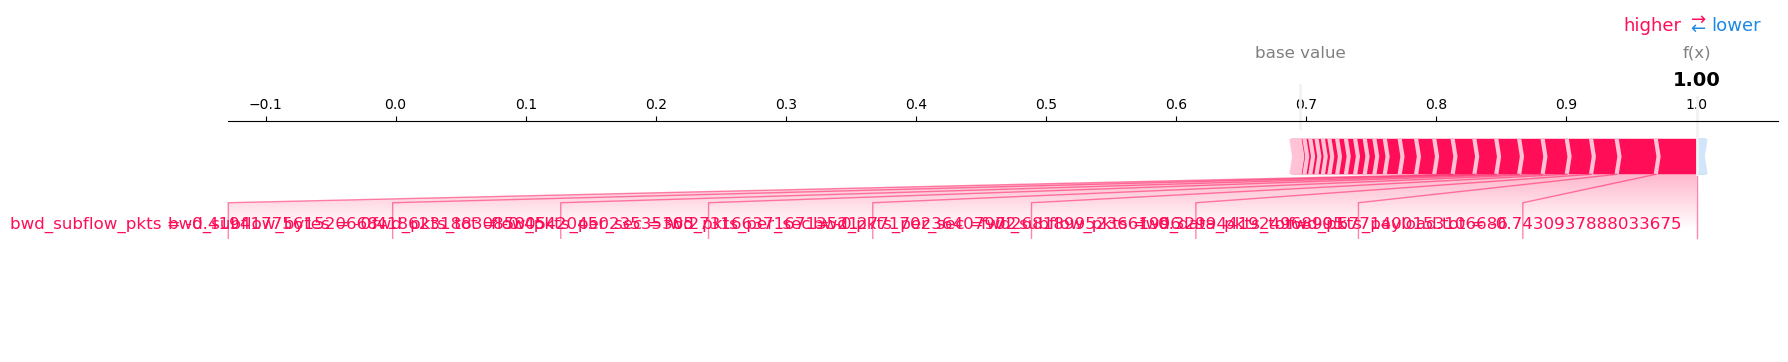

In [22]:
shap.initjs()

prediction = model.predict(X_test[start_index:end_index])[0]
print(f"The RF predicted: {prediction}")

shap.force_plot(explainer.expected_value[1],
                      shap_values[1],
                      X_test[start_index:end_index],
                      feature_names=feature_names,
                      matplotlib=True)

#### shap.Explainer(model)

- This is a generic explainer that can be used with any type of machine learning model.
- It is model-agnostic and can handle a wide range of model types, including linear models, neural networks, and more.
- It approximates the Shapley values using a sampling approach, which might be computationally expensive for complex models or large datasets.

#### shap.TreeExplainer(model)

- This explainer is specifically designed for tree-based models, such as decision trees, random forests, and gradient boosting machines.
- It leverages the exact Shapley value computation for tree ensembles, making it computationally efficient for tree-based models.
- It provides accurate and faster Shapley values for tree models.

The plot visualizes the impact of each feature on the model's output for the specified instance.

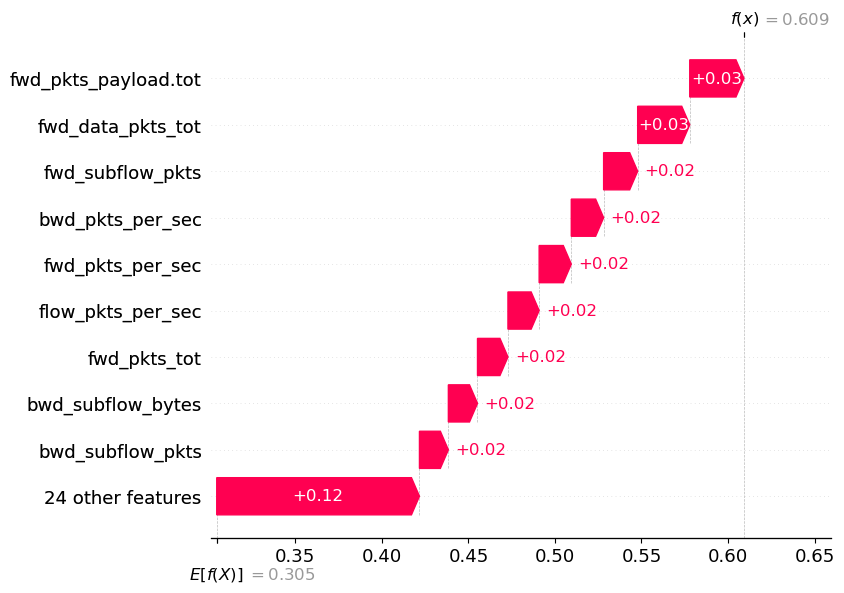

In [23]:
#explainer = shap.Explainer(model)
explainer = shap.TreeExplainer(model)

shap_values = explainer.shap_values(X_test[start_index:end_index])
base_value = explainer.expected_value

# Change shap_values[0] or shap_values[0], if you want explaination for 'Normal' or 'Malicious'
explanation = shap.Explanation(values=shap_values[1], base_values=base_value,feature_names=feature_names)

shap.plots.waterfall(explanation[0])

Explain the output of machine learning models by attributing the contribution of each feature to the model's prediction.

In [24]:
start_index = 1
end_index = 50

ex = shap.KernelExplainer(model.predict,shap.sample(X_train,100))
shap_values = explainer.shap_values(X_test[start_index:end_index])
shap.force_plot(explainer.expected_value[1], shap_values[1], X_test[start_index:end_index],feature_names=feature_names)

Gain insights into which features have the most significant impact on model predictions across the dataset.

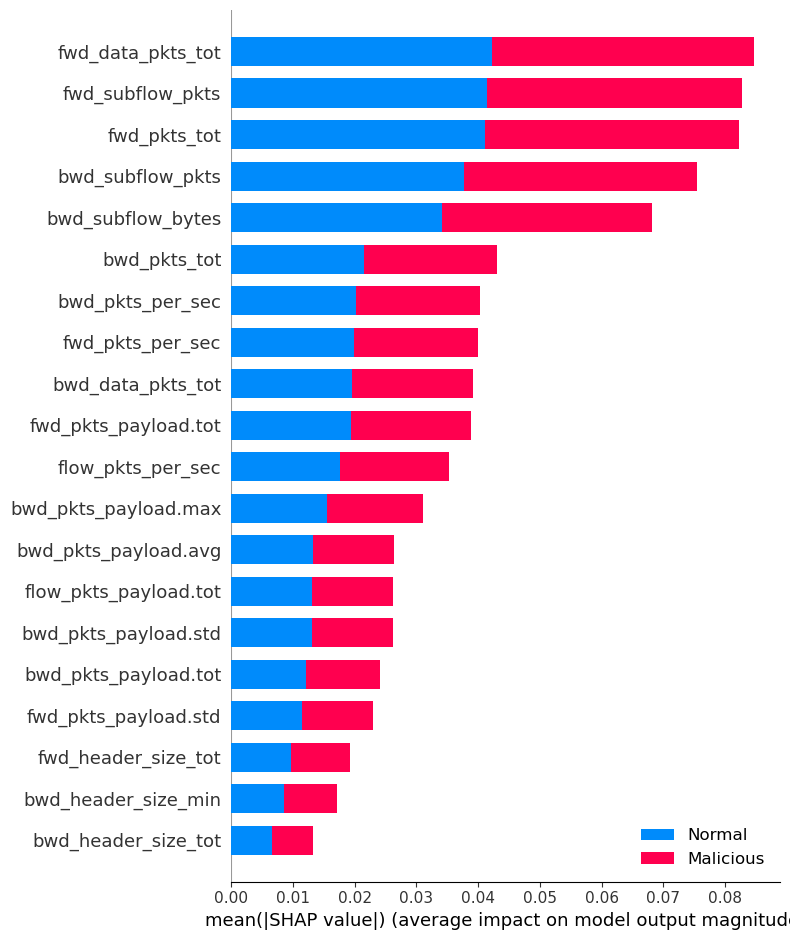

In [25]:
shap.summary_plot(shap_values, X_test,feature_names=feature_names,class_names=class_names)

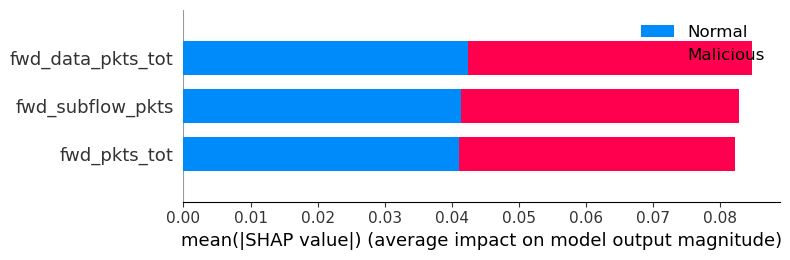

In [26]:
shap.summary_plot(shap_values, X, max_display=3,feature_names=feature_names,class_names=class_names)

Kernel SHAP explainer to compute SHAP values for a subset of instances.
Creates a summary plot to visualize the overall impact of features on model predictions for those instances.

In [27]:
ex = shap.KernelExplainer(model.predict,shap.sample(X_train,100))

  0%|          | 0/49 [00:00<?, ?it/s]

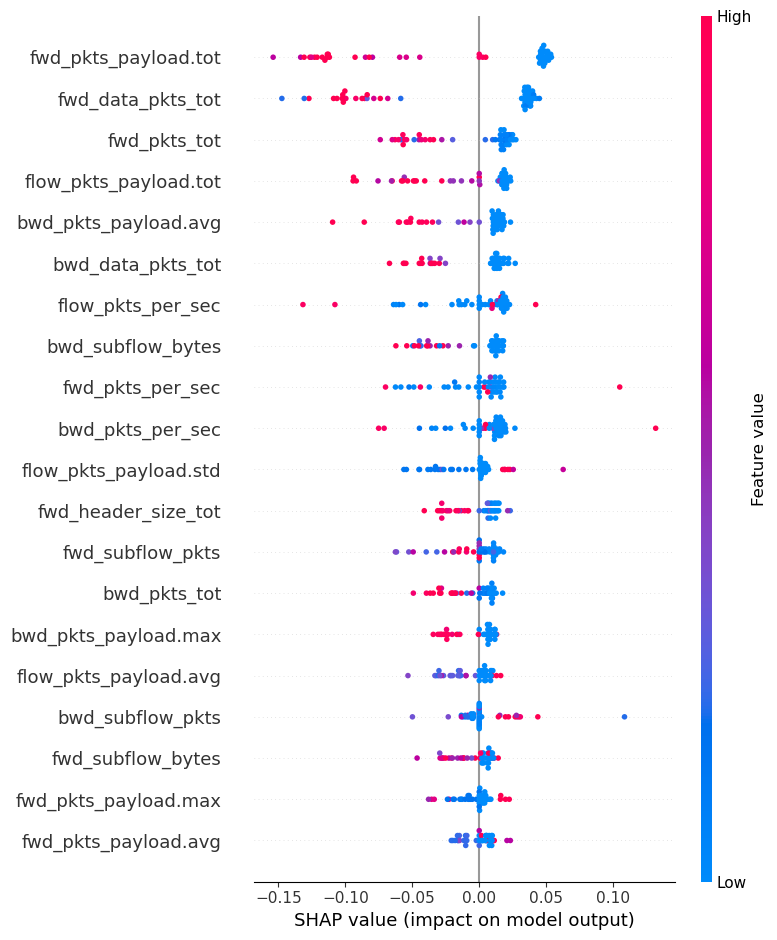

In [28]:
start_index = 1
end_index = 50

shap_values = ex.shap_values(X_test[start_index:end_index])
shap.summary_plot(shap_values, X_test[start_index:end_index],feature_names=feature_names)

In [29]:
start_index = 1
end_index = 1000

explainer = shap.TreeExplainer(model)
shap_values = explainer.shap_values(X_test[start_index:end_index])

SHAP dependence plots show the effect of a single feature across the whole dataset. They plot a feature's value vs. the SHAP value of that feature across many samples. SHAP dependence plots are similar to partial dependence plots, but account for the interaction effects present in the features, and are only defined in regions of the input space supported by data. The vertical dispersion of SHAP values at a single feature value is driven by interaction effects, and another feature is chosen for coloring to highlight possible interactions.

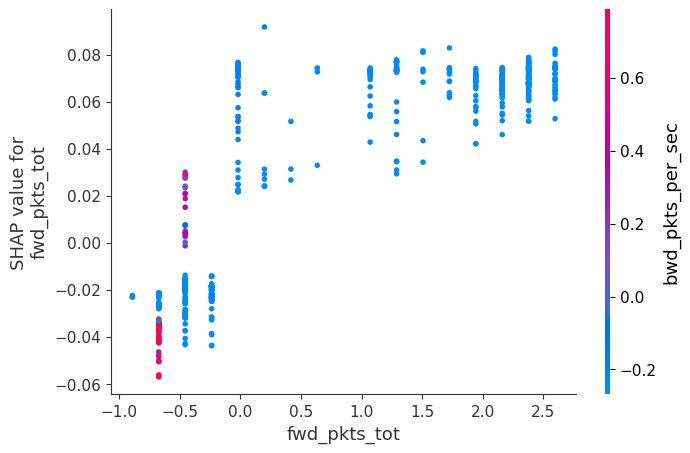

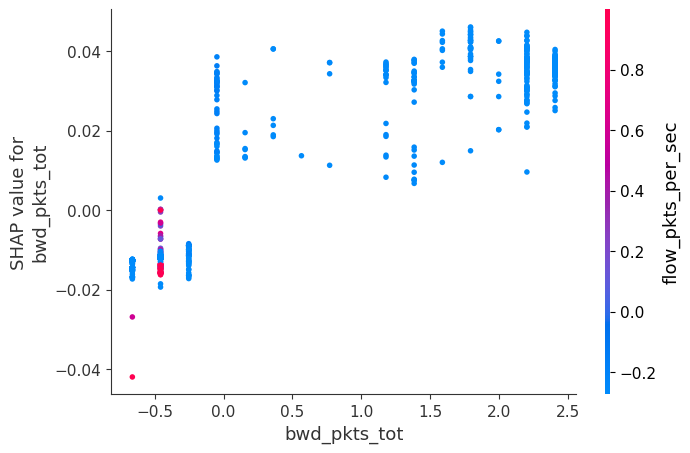

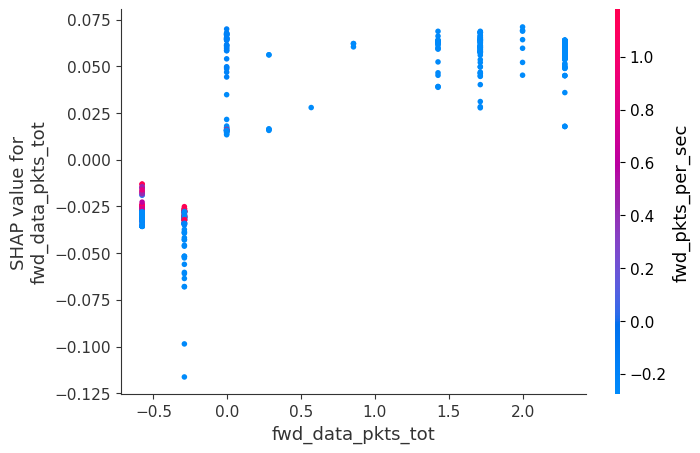

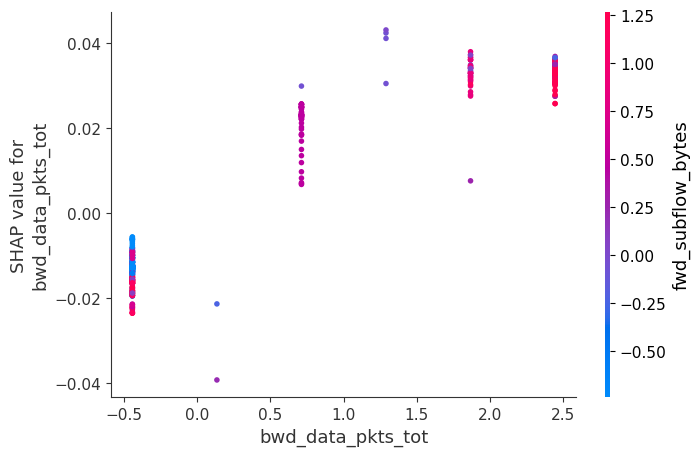

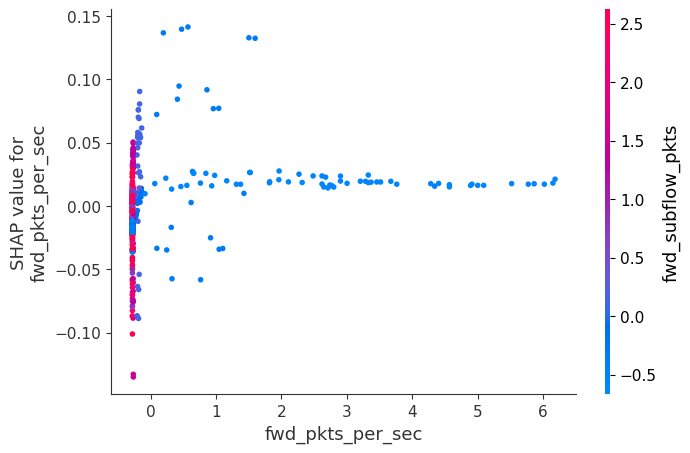

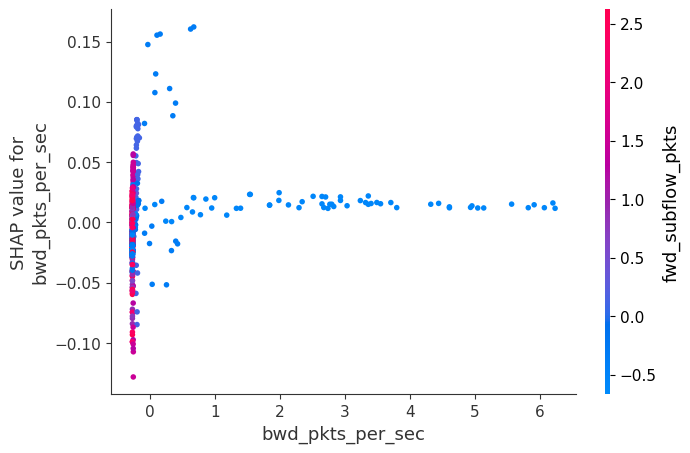

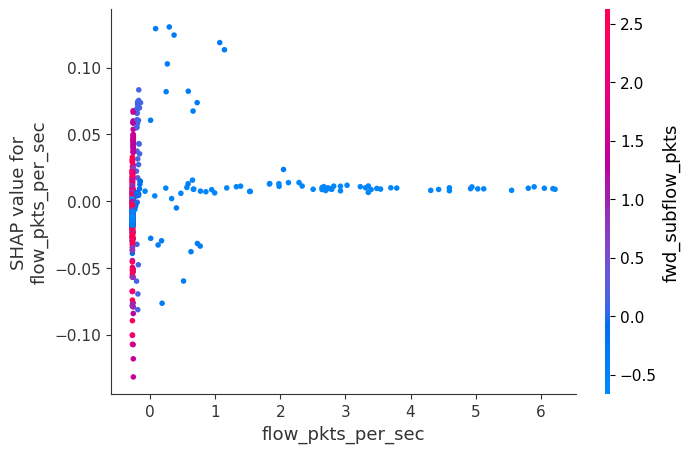

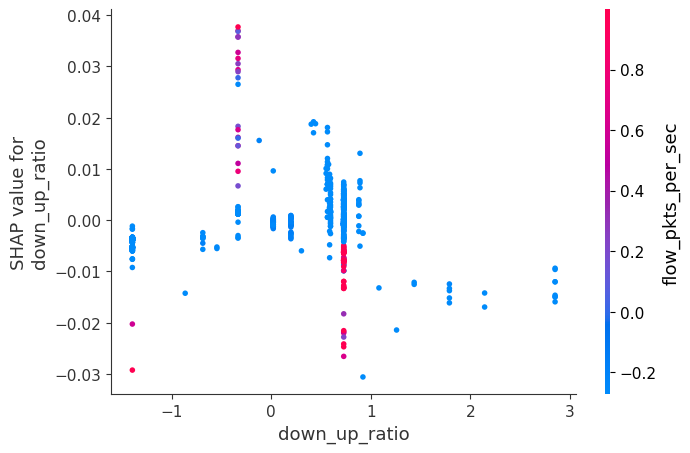

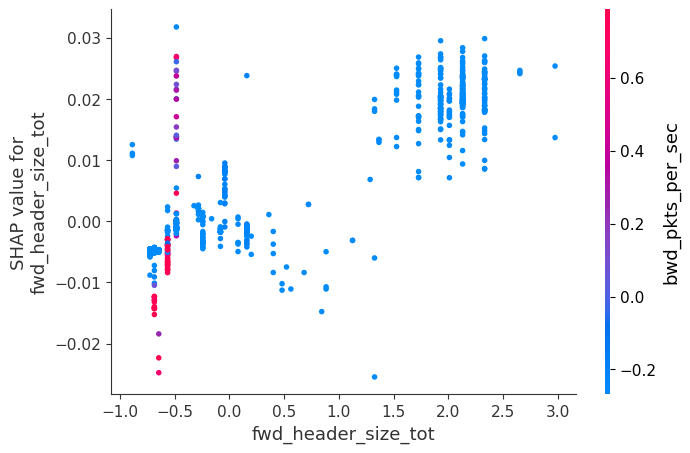

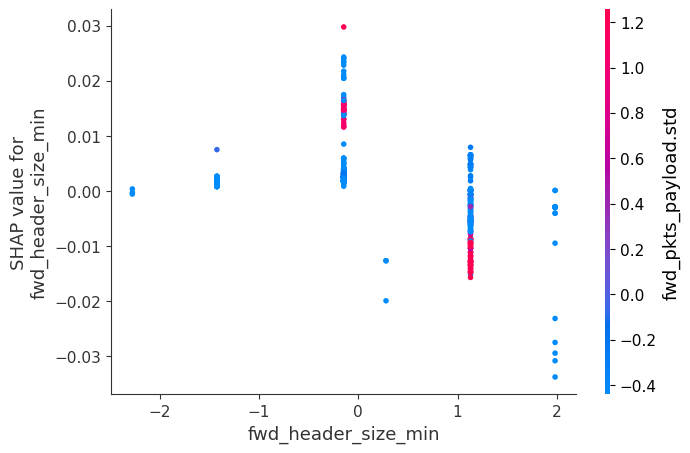

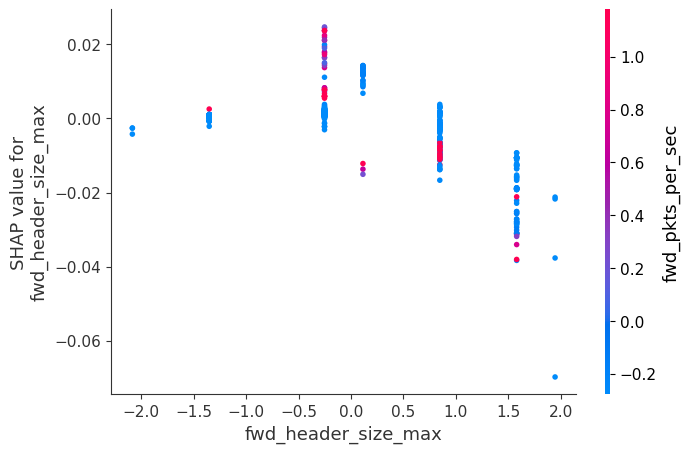

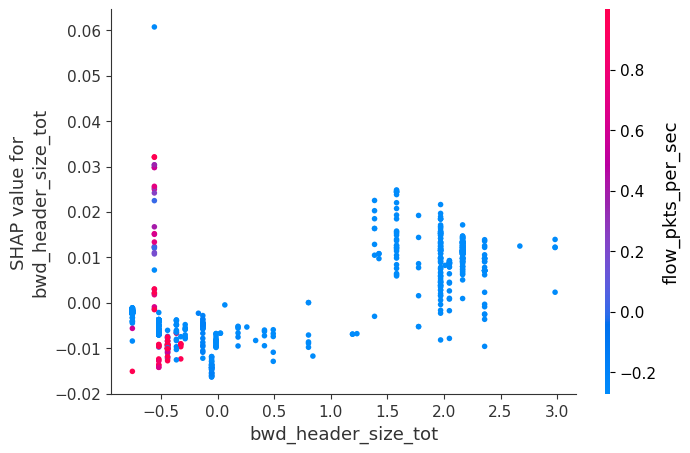

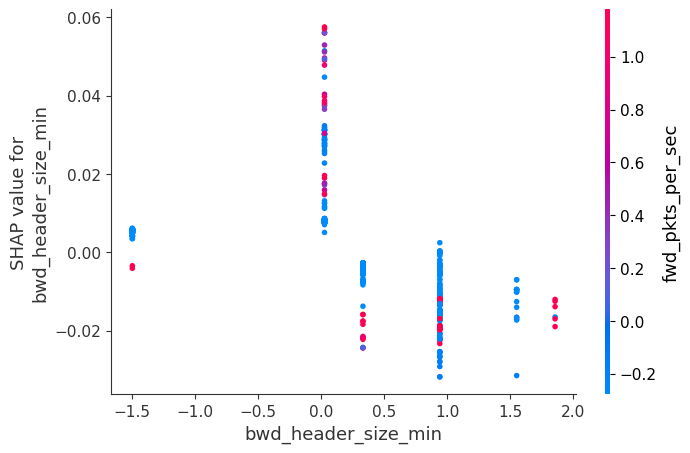

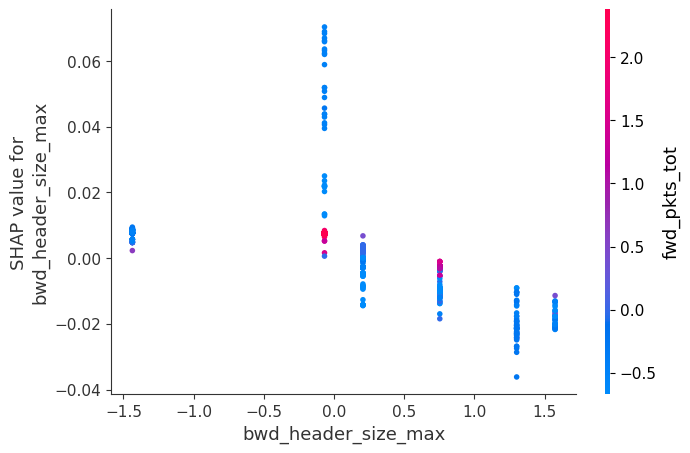

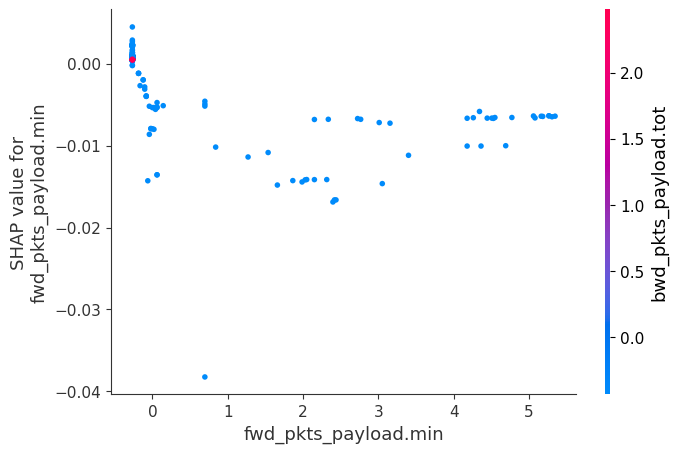

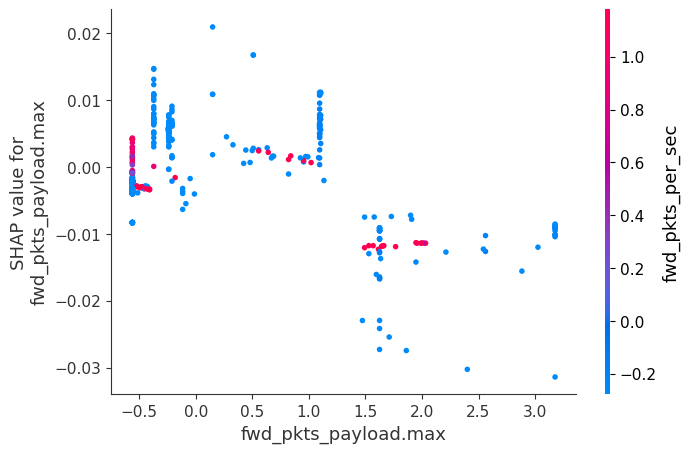

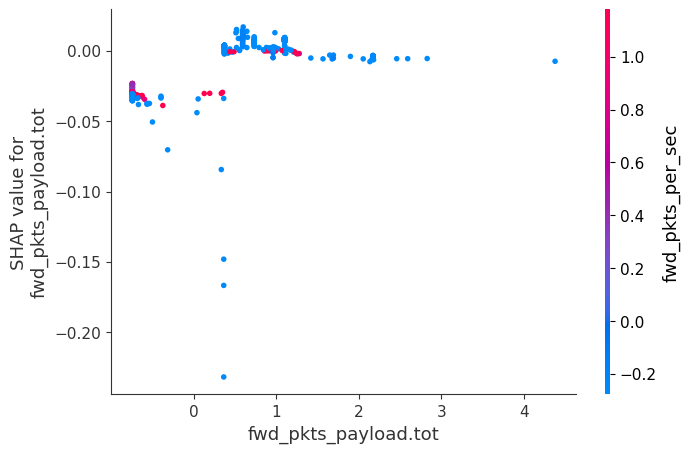

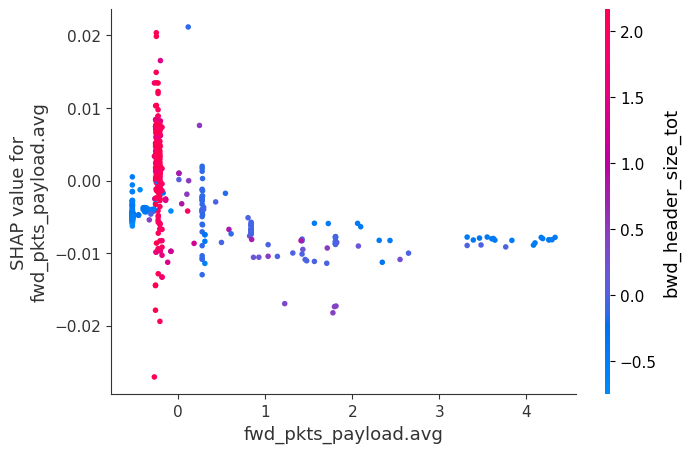

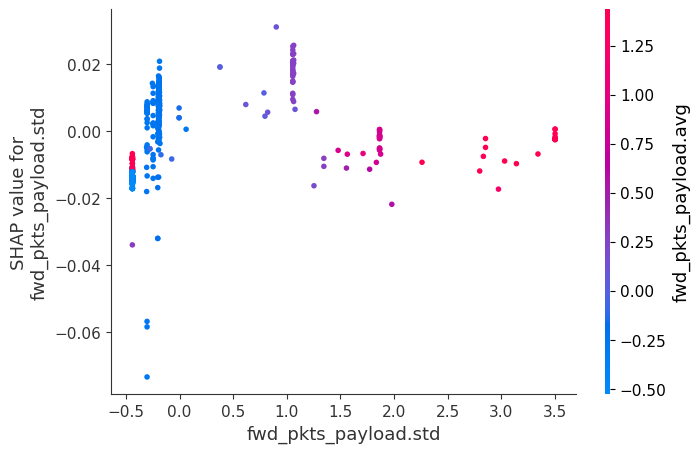

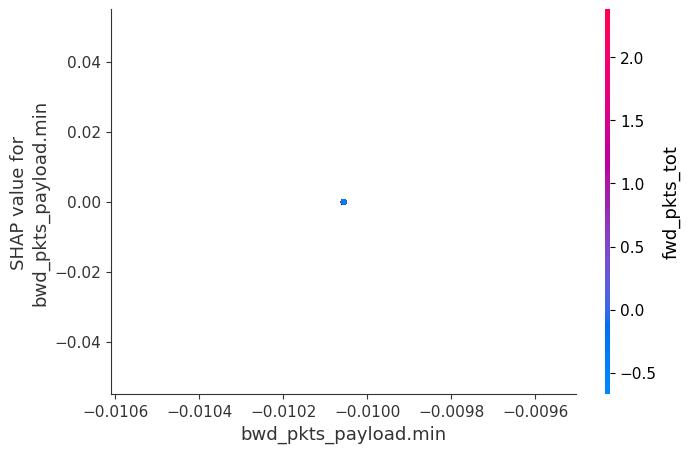

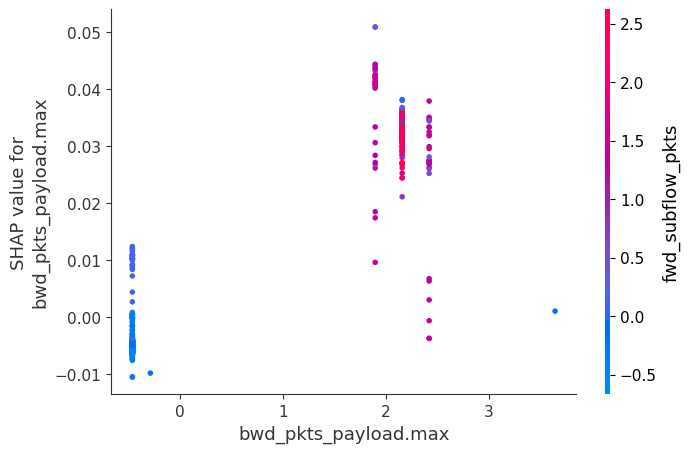

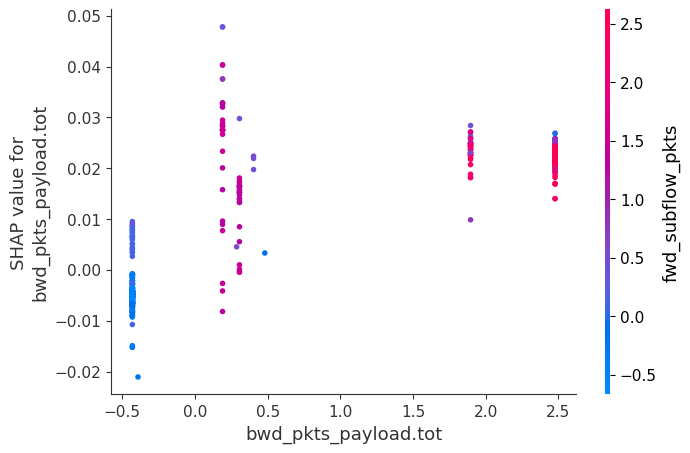

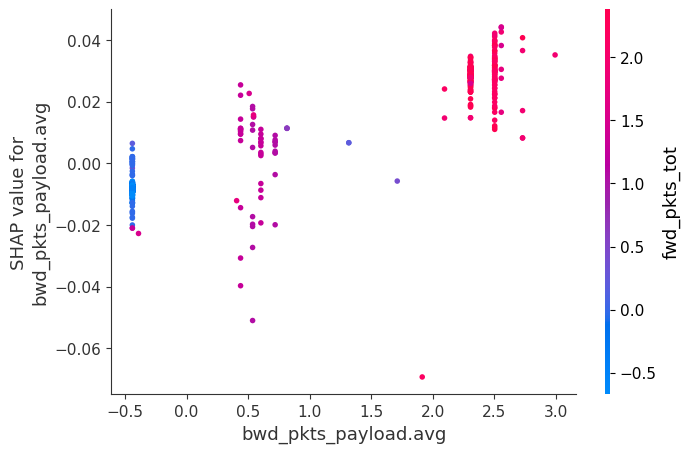

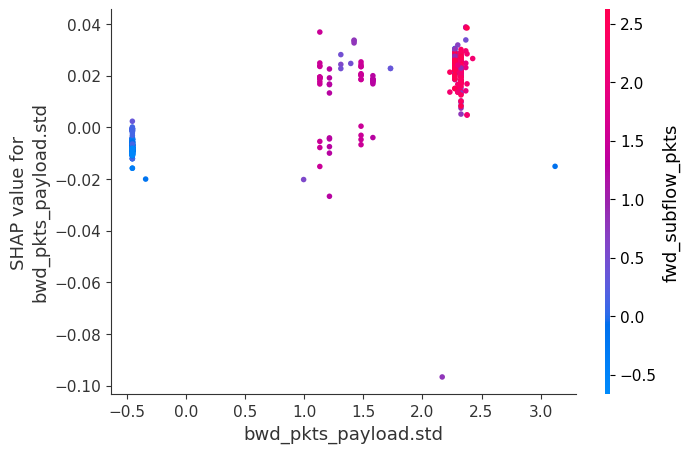

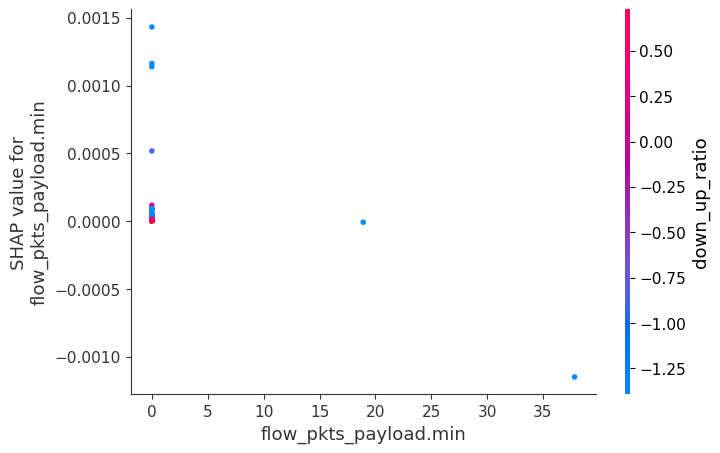

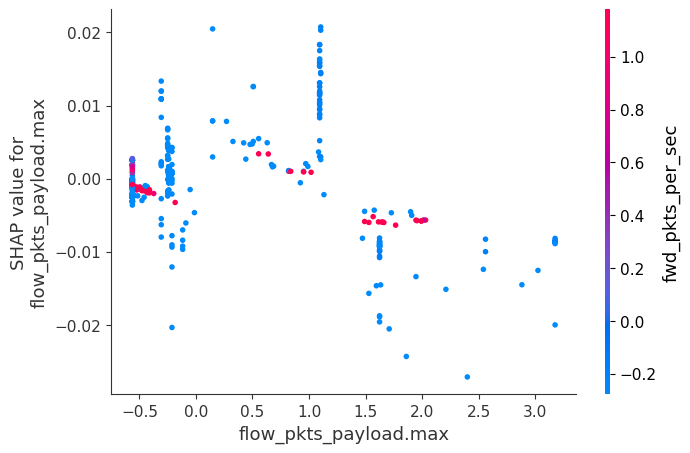

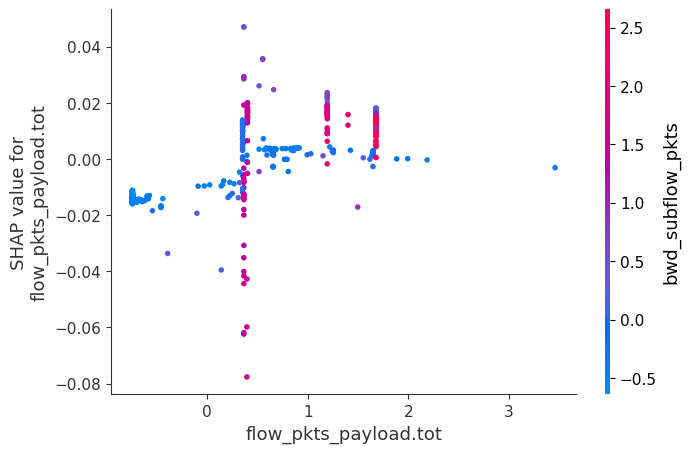

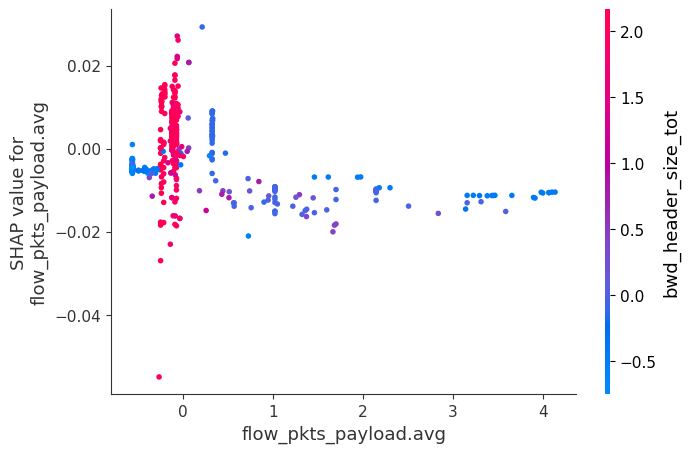

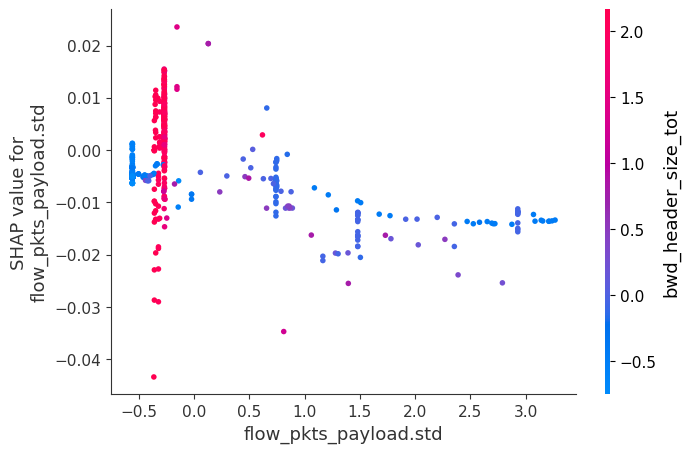

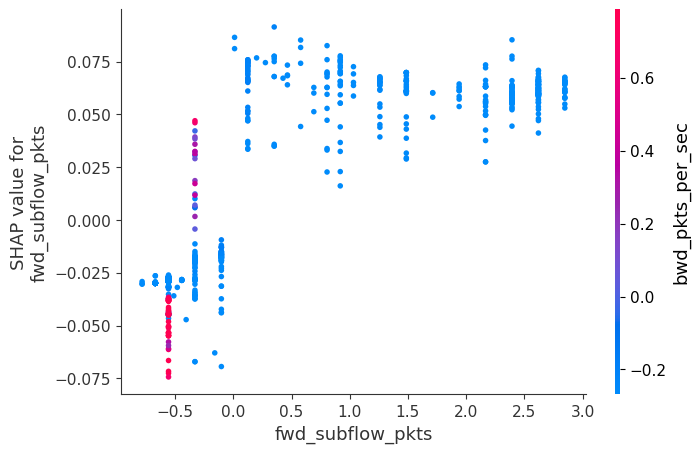

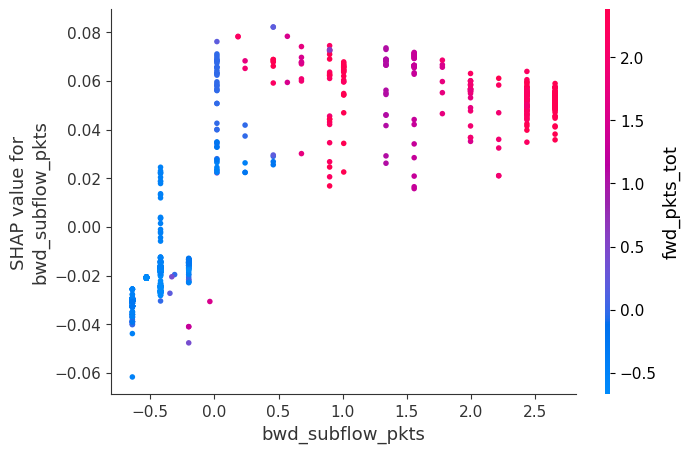

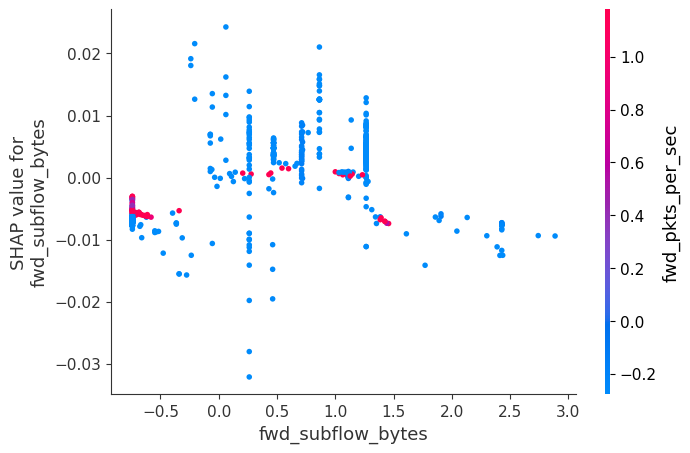

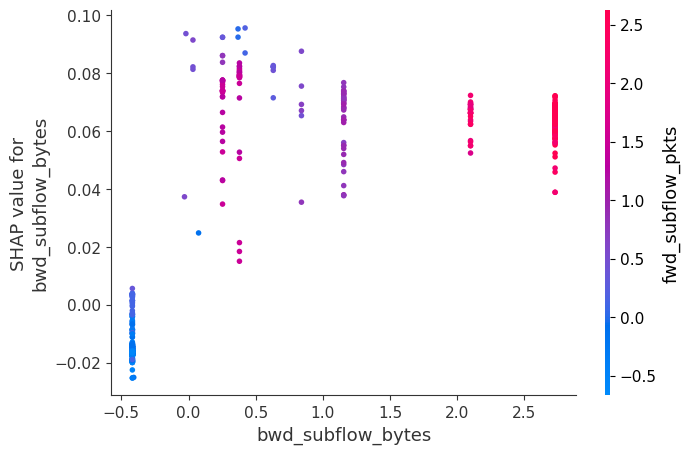

In [30]:
for i in feature_names:
    shap.dependence_plot(
        i, 
        shap_values[0], 
        X_test[start_index:end_index], 
        feature_names=feature_names)

## Dalex

In [31]:
import dalex as dx

ModuleNotFoundError: No module named 'dalex'

In [ ]:
exp = dx.Explainer(model, X_train, y_train)

In [ ]:
exp.predict(X_train)

In [ ]:
exp.model_performance(model_type='classification').plot(geom='roc')

In [ ]:
exp.model_parts().plot()

In [ ]:
feature_names[29]

In [ ]:
pp = exp.predict_parts(X_train[[5]], type='shap_wrapper', shap_explainer_type="TreeExplainer")
type(pp)

In [ ]:
pp.plot()

In [ ]:
pp.result  # shap_values

In [ ]:
mp = exp.model_parts(type='shap_wrapper', shap_explainer_type="TreeExplainer")
type(mp)

In [ ]:
mp.plot()